# Modelando un Sistema de ecuaciones diferenciales del sistema Musculo, Ingesta calorica y volumen de entrenamiento.

En el siguiente notebook desarrollo un modelo matemático  para simular el cuerpo humano en presencia de ejericios de fuerza, ofreciendo en el camino herramientas matemáticas para la maximización de entrenamientos con evidencia cientifica.



$dG/dt=k_1C(t)-k_2M(t)$ 


$dM/dt=k_3V(t)+k_4C(t)$

$dV/dt=k_7M(t)+V(t)+k_8C(t)$

$dF/dt=V(t)+k_9$

In [1]:
import pandas as pd
import numpy as np
from numpy import log10

import matplotlib.pyplot as plt

#Calculando grasa corporal
Cintura=[132,126,127,127,126,126]
Cuello=[46,46,44,45.5,45,46]
altura=168
dif=[e1 - e2 for e1, e2 in zip(Cintura,Cuello)]
pcGrasa=495/(1.0324-0.19077*log10(dif)+0.15456*log10(altura))-450
#David D. Peterson, History of the U.S. Navy Body Composition Program, Military Medicine, 
#Volume 180, Issue 1, January 2015, Pages 91–96, https://doi.org/10.7205/MILMED-D-14-00266

$\%Grasa=\frac{495}{(1.0324-0.19077log(Cintura-Cuello)+0.15456*log(altura)}-450$

In [2]:
peso=[130.7,128.4,129.6,130.1,129.2,128.4]
Fechas=["Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto"]
#Calculando masa muscular neta y grasa neta en cuerpo
MMM=peso*(1-pcGrasa/100)
MG=peso*(pcGrasa/100)

In [3]:
Espalda=[140,142,143,145,139,146,]
#Calculando Metrica Phi 
phi=[e1/e2 for e1, e2 in zip(Espalda,Cintura)]
pF=[e5/1.618 for e5 in phi]
#La meta en el parametro Phi es llegar a la proporción Espalda/Cintura de 1.6 

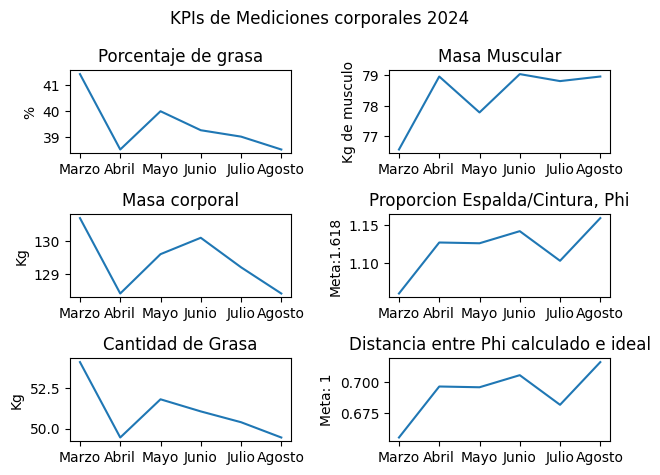

In [4]:

fig = plt.figure(dpi=100)

fig.clf()


ax = fig.subplots(3,2)

ax[0,0].plot(Fechas, pcGrasa)
ax[0,0].set_ylabel('%')
ax[0,0].set_title('Porcentaje de grasa')

ax[1,0].plot(Fechas, peso)
ax[1,0].set_ylabel('Kg')
ax[1,0].set_title('Masa corporal')

ax[0,1].plot(Fechas, MMM)
ax[0,1].set_ylabel('Kg de musculo')
ax[0,1].set_title('Masa Muscular')

ax[1,1].plot(Fechas,phi)
ax[1,1].set_ylabel('Meta:1.618')
ax[1,1].set_title('Proporcion Espalda/Cintura, Phi')

ax[2,1].plot(Fechas,pF)
ax[2,1].set_ylabel('Meta: 1')
ax[2,1].set_title('Distancia entre Phi calculado e ideal')

ax[2,0].plot(Fechas,MG)
ax[2,0].set_ylabel('Kg')
ax[2,0].set_title('Cantidad de Grasa')
fig.suptitle("KPIs de Mediciones corporales 2024")

fig.tight_layout()
